In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from NeuralNet import NeuralNet

data = pd.read_csv("./data/train.csv")

In [2]:
print(data.head())
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [3]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n] / 255.0
X_dev = X_dev.T

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n] / 255.0
X_train = X_train.T

In [4]:
layers = [X_train.shape[1], 128, 64, 10]
model = NeuralNet(layers=layers)
model.available_training_methods()
model.available_optimizers()
model.available_decay_types()
model.set_training_method("batch_gradient_descent")
model.set_optimizer("adam")

model.train(X_train, Y_train, lr=0.001, epochs=5, batch_size=64, log_interval=10)
model.test_predictions(0,X_dev, Y_dev)

Available Methods: ['gd', 'sgd', 'bgd']
Available Optimizers: ['sgd', 'adam', 'momentum', 'rmsprop', 'nesterov']
Available Decay Types: ['exponential_decay', 'step_decay', 'cyclic_decay']
Epoch 0, batch 0, Loss: 2.4074008188266953
Epoch 0, batch 10, Loss: 1.8226568488225992
Epoch 0, batch 20, Loss: 1.1914144041577557
Epoch 0, batch 30, Loss: 0.814055822161459
Epoch 0, batch 40, Loss: 0.6067200590789865
Epoch 0, batch 50, Loss: 0.5248568254817052
Epoch 0, batch 60, Loss: 0.21124414109797401
Epoch 0, batch 70, Loss: 0.24693344680503415
Epoch 0, batch 80, Loss: 0.5736902052212276
Epoch 0, batch 90, Loss: 0.4796482166199466
Epoch 0, batch 100, Loss: 0.3303050344955363
Epoch 0, batch 110, Loss: 0.298201748780215
Epoch 0, batch 120, Loss: 0.4379314525954151
Epoch 0, batch 130, Loss: 0.21096441161663318
Epoch 0, batch 140, Loss: 0.24660746348691837
Epoch 0, batch 150, Loss: 0.27441196745913554
Epoch 0, batch 160, Loss: 0.26106863569858557
Epoch 0, batch 170, Loss: 0.35294402994313817
Epoch 0,

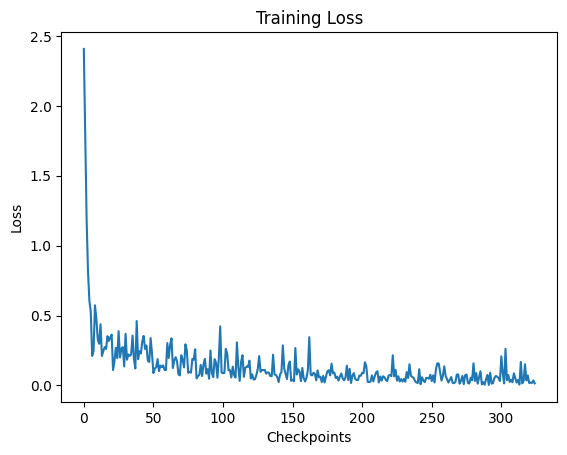

In [5]:
losses = model.get_losses()
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Checkpoints")
plt.ylabel("Loss")
plt.show()

In [6]:
model.evaluate(X_train, Y_train)
model.evaluate(X_dev, Y_dev)

Test Accuracy: 0.9899268292682927
Test Accuracy: 0.973


In [7]:
model.test_predictions(15,X_dev, Y_dev)

Model Prediction: 2
True Label: 2
